In [1]:
!gdown --id 1UN0RjFDRUuNKH8P59svpYbsfdCHLDmuy

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1UN0RjFDRUuNKH8P59svpYbsfdCHLDmuy
From (redirected): https://drive.google.com/uc?id=1UN0RjFDRUuNKH8P59svpYbsfdCHLDmuy&confirm=t&uuid=dc6a02b4-7dd4-4001-81af-0f9460d468d6
To: /content/MangoLeafData.zip
100% 108M/108M [00:01<00:00, 67.7MB/s] 


In [2]:
!unzip '/content/MangoLeafData.zip'

Archive:  /content/MangoLeafData.zip
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124249 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124306 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124253 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124252 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124250 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124302 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124301 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124256 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124310 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124312 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124305 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124334 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/202110

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Set the path to your dataset directory
dataset_dir = "/content/MangoLeafBD Dataset"
categories = os.listdir(dataset_dir)
print("Categories:", categories)


Categories: ['Die Back', 'Bacterial Canker', 'Anthracnose', 'Sooty Mould', 'Cutting Weevil', 'Powdery Mildew', 'Gall Midge', 'Healthy']


In [12]:
# Standard image size and batch size
img_size = (128, 128)
batch_size = 32

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


Number of Classes: 8
Classes: ['Die Back', 'Bacterial Canker', 'Anthracnose', 'Sooty Mould', 'Cutting Weevil', 'Powdery Mildew', 'Gall Midge', 'Healthy']


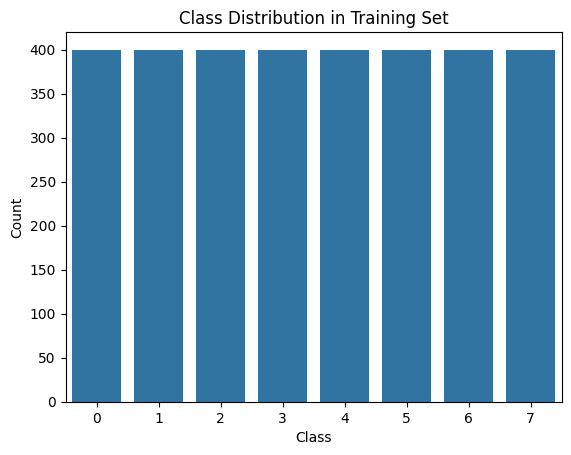

In [13]:
# Dataset Description
num_classes = len(categories)
print(f"Number of Classes: {num_classes}")
print(f"Classes: {categories}")

# Sample Class Distribution Plot
class_counts = train_generator.classes
sns.countplot(x=class_counts)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


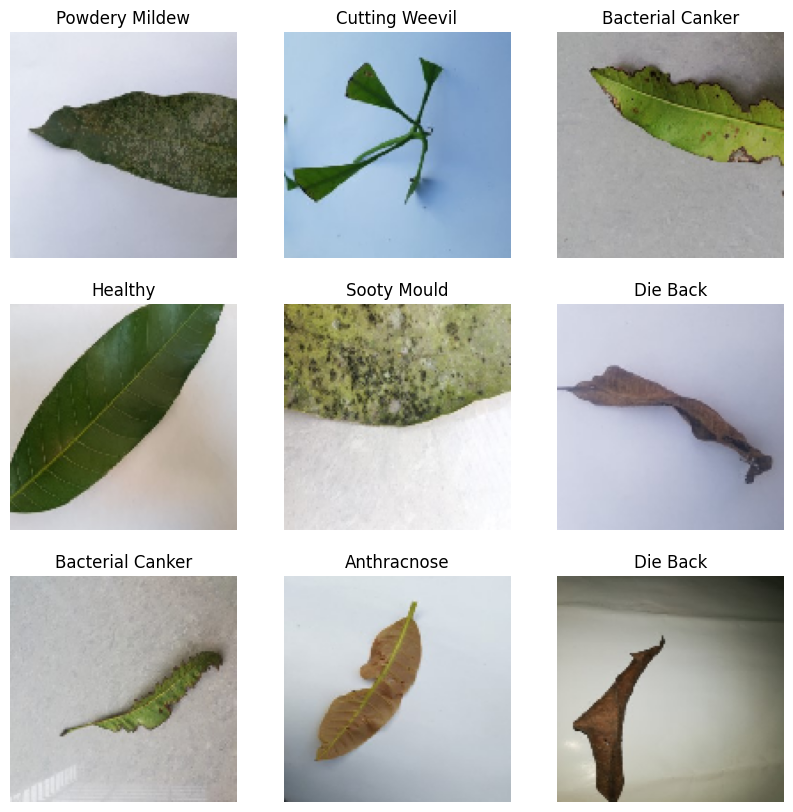

In [14]:
def plot_sample_images(generator):
    class_names = list(generator.class_indices.keys())
    plt.figure(figsize=(10, 10))
    for images, labels in generator:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i])
            plt.title(class_names[np.argmax(labels[i])])
            plt.axis("off")
        break

plot_sample_images(train_generator)


In [15]:
# Load EfficientNetB0 and Freeze Layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add Flatten Layer
x = base_model.output
x = Flatten()(x)
feature_extractor_model = Model(inputs=base_model.input, outputs=x)

# Extract Features and Labels
def extract_features(generator):
    features = []
    labels = []
    for imgs, lbls in generator:
        feats = feature_extractor_model.predict(imgs)
        features.extend(feats)
        labels.extend(lbls)
        if len(features) >= generator.samples:
            break
    return np.array(features), np.array(labels)

X_train, y_train = extract_features(train_generator)
X_val, y_val = extract_features(val_generator)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624

In [16]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, np.argmax(y_train, axis=1))
y_pred_dt = dt_model.predict(X_val)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
rf_model.fit(X_train, np.argmax(y_train, axis=1))
y_pred_rf = rf_model.predict(X_val)



========== Decision Tree Evaluation ==========
Accuracy: 0.4950

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.60      0.50       100
           1       0.34      0.44      0.38       100
           2       0.93      0.62      0.74       100
           3       0.82      0.84      0.83       100
           4       0.24      0.23      0.23       100
           5       0.58      0.40      0.47       100
           6       0.49      0.47      0.48       100
           7       0.36      0.36      0.36       100

    accuracy                           0.49       800
   macro avg       0.52      0.49      0.50       800
weighted avg       0.52      0.49      0.50       800


Confusion Matrix:


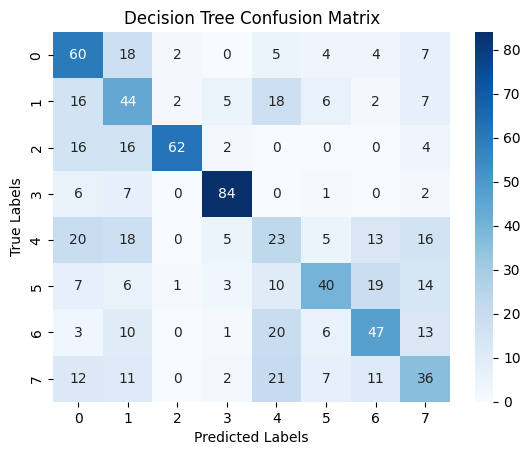


========== Random Forest Evaluation ==========
Accuracy: 0.6425

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.55      0.53       100
           1       0.59      0.69      0.64       100
           2       1.00      0.76      0.86       100
           3       0.74      0.97      0.84       100
           4       0.41      0.42      0.41       100
           5       0.75      0.81      0.78       100
           6       0.71      0.55      0.62       100
           7       0.48      0.39      0.43       100

    accuracy                           0.64       800
   macro avg       0.65      0.64      0.64       800
weighted avg       0.65      0.64      0.64       800


Confusion Matrix:


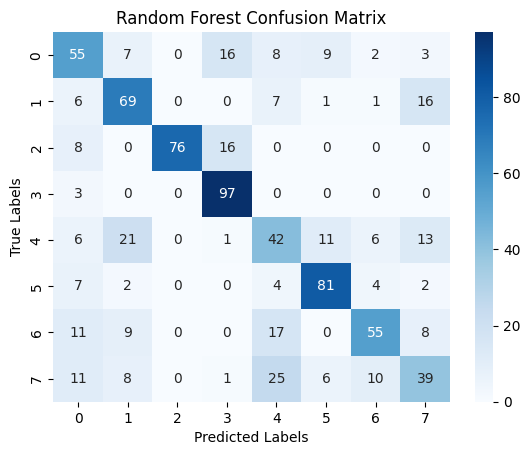

In [17]:
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n{'='*10} {model_name} Evaluation {'='*10}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Evaluate Decision Tree
evaluate_model("Decision Tree", np.argmax(y_val, axis=1), y_pred_dt)

# Evaluate Random Forest
evaluate_model("Random Forest", np.argmax(y_val, axis=1), y_pred_rf)


<ipython-input-18-f050549a9591>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')


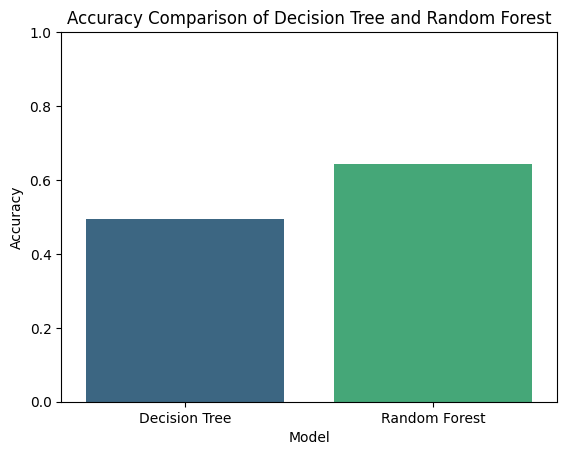

In [18]:
# Accuracy Comparison
accuracy_dt = accuracy_score(np.argmax(y_val, axis=1), y_pred_dt)
accuracy_rf = accuracy_score(np.argmax(y_val, axis=1), y_pred_rf)

# Bar Plot for Accuracy Comparison
accuracy_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_dt, accuracy_rf]
})

sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title("Accuracy Comparison of Decision Tree and Random Forest")
plt.ylim(0, 1)
plt.show()


In [ ]:
# Feature Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = pd.DataFrame(X_train).corr()
sns.heatmap(correlation_matrix, annot=False, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()
